In [43]:
import pandas as pd


In [44]:
df = pd.read_csv('Housing.csv')

In [45]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [47]:
df = df[['area','bedrooms','bathrooms','price']]

In [48]:
df.describe()

,area,bedrooms,bathrooms,price
count,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,4.766729e+06
std,2170.141023,0.738064,0.502470,1.870440e+06
min,1650.000000,1.000000,1.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,1.330000e+07


In [49]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [50]:
df['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [51]:
df = df[df['bathrooms'] != 4]

In [52]:
df.corr()

,area,bedrooms,bathrooms,price
area,1.000000,0.148014,0.181813,0.532461
bedrooms,0.148014,1.000000,0.370733,0.362188
bathrooms,0.181813,0.370733,1.000000,0.498528
price,0.532461,0.362188,0.498528,1.000000


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
from pandas.plotting import scatter_matrix

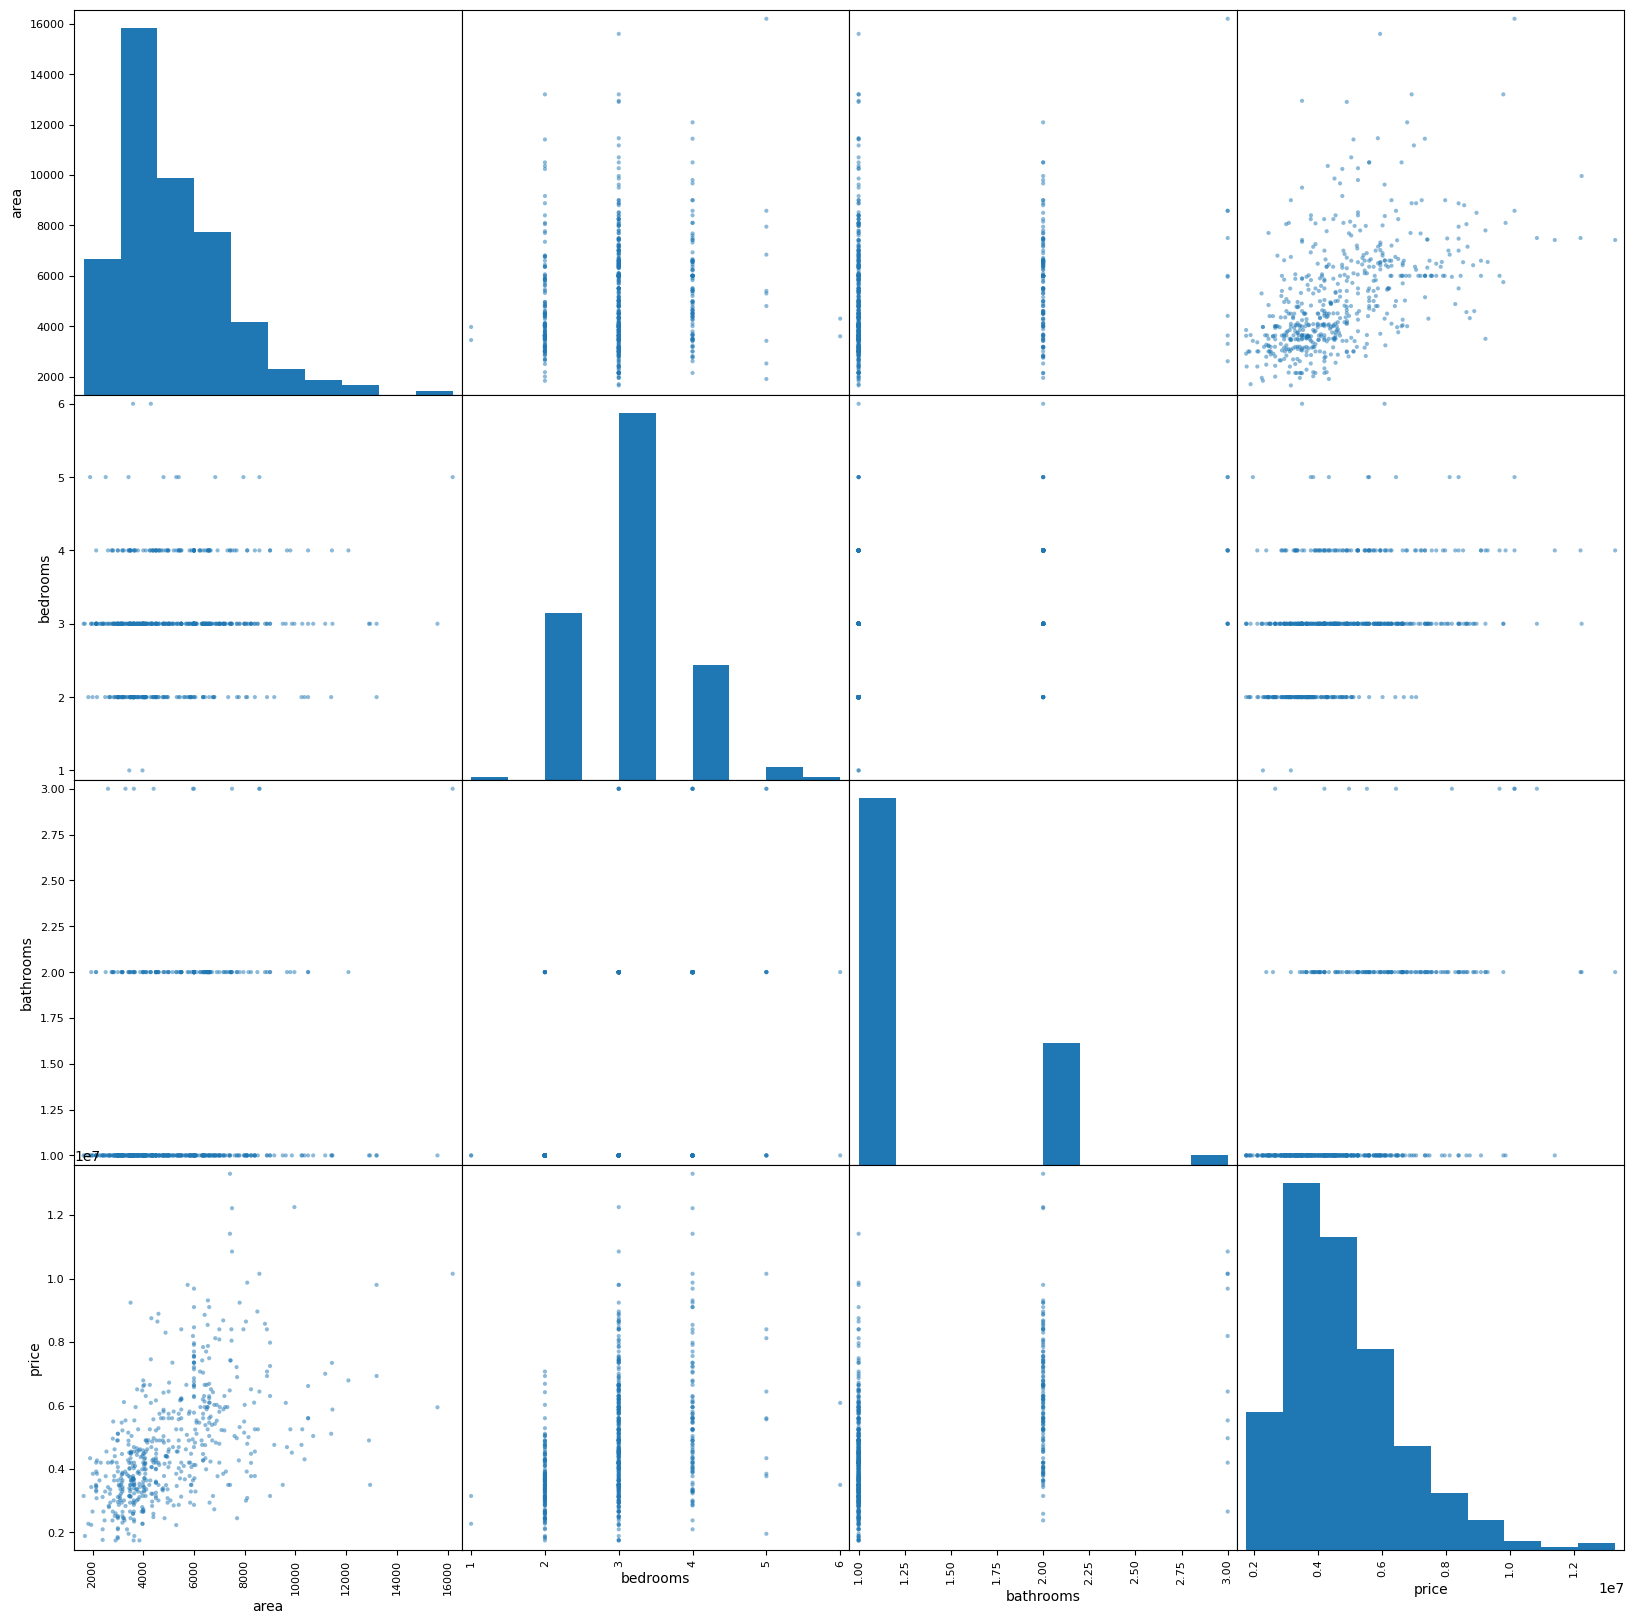

In [55]:
scatter_matrix(df,figsize=(20,20))
plt.show()

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [119]:
x_train = train.drop(columns= ['price'])
y_train = train['price']
x_test = test.drop(columns= ['price'])
y_test = test['price']

In [120]:
print(y_test)

458    3115000
258    4480000
358    3745000
533    2100000
543    1750000
        ...   
507    2590000
279    4270000
47     7490000
94     6300000
333    3920000
Name: price, Length: 109, dtype: int64


In [121]:
some_data = x_test.iloc[:5]
some_lables = y_test.iloc[:5]

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.pipeline import Pipeline

In [124]:
step1 = StandardScaler()
step2 = DecisionTreeRegressor()
# pipe = Pipeline([
#     ('step1' , step1),
#     ('step2' , step2)
# ])

In [125]:

x_train_scaled=step1.fit_transform(x_train)

x_test_scaled = step1.transform(x_test)
# some_data_scaled = step1.fit_transform(some_data)

In [126]:
print(x_test_scaled)

[[-6.07036934e-01  7.35649679e-02 -5.63708883e-01]
 [-5.17717847e-01  7.35649679e-02 -5.63708883e-01]
 [-7.80974102e-01 -1.25980007e+00 -5.63708883e-01]
 [-1.28868259e+00  7.35649679e-02 -5.63708883e-01]
 [-1.04893136e+00  7.35649679e-02 -5.63708883e-01]
 [ 2.62648906e-01  7.35649679e-02 -5.63708883e-01]
 [-1.60441502e-01  7.35649679e-02 -5.63708883e-01]
 [ 6.38729269e-01  7.35649679e-02  1.49690762e+00]
 [ 1.46140506e+00  7.35649679e-02  1.49690762e+00]
 [-3.01471639e-01  1.40693001e+00  1.49690762e+00]
 [ 5.19870367e+00  2.74029505e+00  3.55752413e+00]
 [-1.40855821e+00  7.35649679e-02 -5.63708883e-01]
 [-7.71572093e-01  1.40693001e+00 -5.63708883e-01]
 [ 6.85739315e-01 -1.25980007e+00  1.49690762e+00]
 [-5.50624879e-01  7.35649679e-02 -5.63708883e-01]
 [-3.01471639e-01 -1.25980007e+00 -5.63708883e-01]
 [-5.55325884e-01  7.35649679e-02 -5.63708883e-01]
 [ 2.96102551e+00  1.40693001e+00 -5.63708883e-01]
 [-1.07431678e+00  7.35649679e-02 -5.63708883e-01]
 [-8.93798211e-01 -1.25980007e+

In [127]:
model = LinearRegression()

In [128]:
print(x_train_scaled)

[[ 3.64737217  0.07356497 -0.56370888]
 [ 2.9469225  -1.25980007 -0.56370888]
 [-0.73866506  0.07356497 -0.56370888]
 ...
 [-1.52138232  2.74029505 -0.56370888]
 [-1.40855821  0.07356497 -0.56370888]
 [ 0.5682142   0.07356497  1.49690762]]


In [129]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [108]:
# model.predict(some_data_scaled)

In [109]:
# some_lables

In [130]:
predictions = model.predict(x_test_scaled)

In [131]:
mean_squared_error(y_test,predictions)

2419607312439.629

In [115]:
import numpy as np

In [116]:
np.sqrt(mean_squared_error(y_test,predictions))

1555508.698927662